In [1]:
import cs109style
cs109style.customize_mpl()
cs109style.customize_css()

# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

from collections import defaultdict

import pandas as pd
import matplotlib.pyplot as plt
import requests
from pattern import web



Setting custom matplotlib visual style
Setting custom CSS for the IPython Notebook


/Users/ctang/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Fetching population data from Wikipedia

In this example we will fetch data about countries and their population from Wikipedia.

http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population has several tables for individual countries, subcontinents as well as different years. We will combine the data for all countries and all years in a single panda dataframe and visualize the change in population for different countries.

###We will go through the following steps:
* fetching html with embedded data
* parsing html to extract the data
* collecting the data in a panda dataframe
* displaying the data

To give you some starting points for your homework, we will also show the different sub-steps that can be taken to reach the presented solution.

## Fetching the Wikipedia site

In [2]:
url = 'http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population'
website_html = requests.get(url).text
print website_html

<!DOCTYPE html>
<html lang="en" dir="ltr" class="client-nojs">
<head>
<meta charset="UTF-8" />
<title>List of countries by past, current and future population - Wikipedia, the free encyclopedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>window.RLQ = window.RLQ || []; window.RLQ.push( function () {
mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_past,_current_and_future_population","wgTitle":"List of countries by past, current and future population","wgCurRevisionId":690567081,"wgRevisionId":690567081,"wgArticleId":20928488,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Lists of countries by population"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"

## Parsing html data

In [56]:
def get_population_html_tables(html):
    """Parse html and return html tables of wikipedia population data."""
    dom = web.Element(html)
    tbls = [t for t in dom.by_tag('table') if t.attributes['class'] == 'sortable wikitable']
    # tbls = [t for t in dom.by_tag('table') if t.attributes['class'] == 'wikitable sortable']
    return tbls

tables = get_population_html_tables(website_html)
print "table length: %d" %len(tables)
for t in tables:
    print t.attributes


table length: 3
{u'style': u'text-align: right', u'class': u'sortable wikitable'}
{u'style': u'text-align: right', u'class': u'sortable wikitable'}
{u'style': u'text-align: right', u'class': u'sortable wikitable'}


In [57]:
def table_type(tbl):
    headers = [th.content for th in tbl.by_tag('th')]
    return headers[1]

# group the tables by type
tables_by_type = defaultdict(list)  # defaultdicts have a default value that is inserted when a new key is accessed
for tbl in tables:
    tables_by_type[table_type(tbl)].append(tbl)

print tables_by_type

defaultdict(<type 'list'>, {u'Country (or dependent territory)': [Element(tag=u'table'), Element(tag=u'table'), Element(tag=u'table')]})


## Extracting data and filling it into a dictionary

In [65]:
def get_countries_population(tables):
    """Extract population data for countries from all tables and store it in dictionary."""
    
    result = defaultdict(dict)

    # 1. step: try to extract data for a single table

    # 2. step: iterate over all tables, extract headings and actual data and combine data into single dict
    
    for tbl in tables:
        # extract column headers    
        # each table looks a little different, therefore extract columns that store data (i.e., table header is a year)
        tbl_headers = [ th.content for th in tbl.by_tag('th')]
        column_idx_years = [(idx, int(header)) for idx, header in enumerate(tbl_headers) if header.isnumeric()]
        column_idx, column_years = zip(*column_idx_years)
        
        # extract data from table
    
        # get table rows - but skip the ones that have no td element
        tbl_rows = [ row for row in tbl.by_tag('tr') if row.by_tag('td') ]
        #print len(trs)
        #print trs[0]
    
        for row in tbl_rows:
    
            #datarow = [td.content for td in tr.by_tag('td')]
            #print datarow
        
            # get country name - 2nd td, a href, convert unicode to string
            countryname = (row.by_tag('td')[1].by_tag('a')[0].content).encode('ascii','ignore') 

            countrydata = { column_years[i] : int(row.by_tag('td')[idx].content.replace(',', '').replace('<b>', '').replace('</b>', ''))/1000.0 for i,idx in enumerate(column_idx) }
            result[countryname].update(countrydata)
    
    return result


result = get_countries_population(tables_by_type['Country (or dependent territory)'])
print result

defaultdict(<type 'dict'>, {'Canada': {1985: 25.942, 2050: 41.136, 1955: 16.051, 2020: 36.388, 1990: 27.791, 1960: 18.267, 2025: 37.559, 1995: 29.691, 1965: 20.072, 2030: 38.565, 2000: 31.1, 1970: 21.75, 2035: 39.396, 2005: 32.387, 1975: 23.21, 2040: 40.071, 2010: 33.76, 1980: 24.594, 2045: 40.636, 1950: 14.012, 2015: 35.1}, 'Saint Martin': {1985: 0.016, 2050: 0.035, 1955: 0.004, 2020: 0.033, 1990: 0.031, 1960: 0.005, 2025: 0.034, 1995: 0.033, 1965: 0.005, 2030: 0.034, 2000: 0.029, 1970: 0.006, 2035: 0.034, 2005: 0.028, 1975: 0.007, 2040: 0.035, 2010: 0.031, 1980: 0.008, 2045: 0.035, 1950: 0.003, 2015: 0.032}, 'Guernsey': {1985: 0.056, 2050: 0.067, 1955: 0.047, 2020: 0.068, 1990: 0.063, 1960: 0.047, 2025: 0.068, 1995: 0.061, 1965: 0.051, 2030: 0.069, 2000: 0.062, 1970: 0.054, 2035: 0.068, 2005: 0.064, 1975: 0.054, 2040: 0.068, 2010: 0.065, 1980: 0.054, 2045: 0.068, 1950: 0.046, 2015: 0.067}, 'Lithuania': {1985: 3.588, 2050: 1.802, 1955: 2.615, 2020: 2.732, 1990: 3.684, 1960: 2.765, 202

## Creating a dataframe from a dictionary

In [66]:
# create dataframe

df = pd.DataFrame.from_dict(result, orient='index')
# sort based on year
df.sort(axis=1,inplace=True)
print df


                                  1950      1955      1960      1965  \
Afghanistan                      8.151     8.892     9.830    10.998   
Albania                          1.228     1.393     1.624     1.884   
Algeria                          8.893     9.842    10.910    11.964   
American Samoa                   0.020     0.020     0.021     0.025   
Andorra                          0.007     0.007     0.009     0.014   
Angola                           4.118     4.424     4.798     5.135   
Anguilla                         0.006     0.006     0.006     0.006   
Antigua and Barbuda              0.046     0.052     0.055     0.060   
Argentina                       17.151    18.928    20.617    22.284   
Armenia                          1.356     1.566     1.869     2.206   
Aruba                            0.050     0.054     0.058     0.060   
Australia                        8.268     9.278    10.362    11.440   
Austria                          6.936     6.947     7.048     7

/Users/ctang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(....) is deprecated, use sort_index(.....)


## Some data accessing functions for a panda dataframe

In [80]:
"""
subtable = df.iloc[0:2, 0:2]
print "subtable"
print subtable
print ""

column = df[1955]
print "column"
print column
print ""

row = df.ix[0] #row 0
print "row"
print row
print ""

rows = df.ix[:2] #rows 0,1
print "rows"
print rows
print ""

element = df.ix[0,1955] #element
print "element"
print element
print ""

# max along column
print "max"
print df[1950].max()
print ""

# axes
print "axes"
print df.axes
print ""

row = df.ix[0]
print "row info"
print row.name
print row.index
print ""

countries =  df.index
print "countries"
print countries
print ""

print "Austria"
print df.ix['Austria']
"""
print df.ix['Austria'][1955]

6.947


## Plotting population of 4 countries

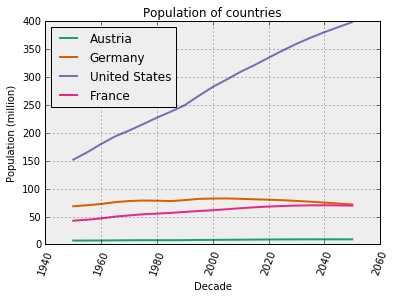

In [94]:
plotCountries = ['Austria', 'Germany', 'United States', 'France']
    
for country in plotCountries:
    row = df.ix[country]
    plt.plot(row.index, row, label=row.name ) 
    
plt.ylim(ymin=0) # start y axis at 0

plt.xticks(rotation=70)
plt.legend(loc='best')
plt.xlabel("Decade")
plt.ylabel("Population (million)")
plt.title("Population of countries")

## Plot 5 most populous countries from 2010 and 2060

/Users/ctang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


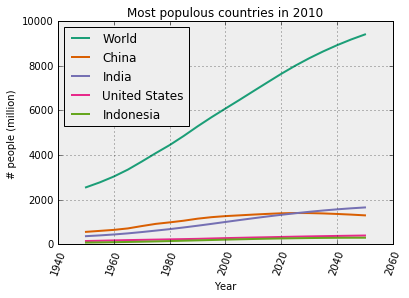

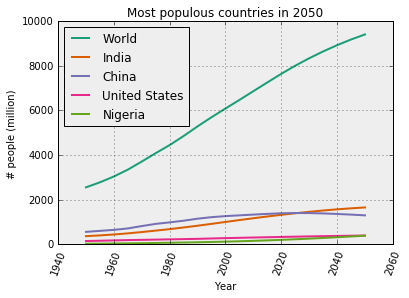

In [90]:
def plot_populous(df, year):
    # sort table depending on data value in year column
    df_by_year = df.sort(year, ascending=False)
    
    plt.figure()
    for i in range(5):  
        row = df_by_year.ix[i]
        plt.plot(row.index, row, label=row.name ) 
            
    plt.ylim(ymin=0)
    
    plt.xticks(rotation=70)
    plt.legend(loc='best')
    plt.xlabel("Year")
    plt.ylabel("# people (million)")
    plt.title("Most populous countries in %d" % year)

plot_populous(df, 2010)
plot_populous(df, 2050)